In [1]:
%matplotlib inline
import requests
import json
import datetime
import pandas as pd
from pandas import json_normalize
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn
import numpy as np

tickers = ['NFLX', 'DIS', 'AMZN' , 'T']
token = "bu5ii7748v6qku33uo40"

data = []
url = ('https://finnhub.io/api/v1/stock/profile2?token=bu5ii7748v6qku33uo40&symbol=')
#url = ('https://finnhub.io/api/v1/stock/profile2?symbol=&token=bu5ii7748v6qku33uo40')
for i in tickers:
    target_url = url + i
    response = requests.get(target_url).json()
    #company_profile_df = json_normalize(response)
    #df.append(company_profile_df)
    data.append(response)

df = pd.DataFrame.from_dict(data)
df
# company_profile = requests.get(url)
# company_profile_json = company_profile.json()
# company_profile_json


,country,currency,exchange,finnhubIndustry,ipo,logo,marketCapitalization,name,phone,shareOutstanding,ticker,weburl
0,US,USD,NASDAQ NMS - GLOBAL MARKET,Media,2002-05-29,https://static.finnhub.io/logo/c9021546-826a-1...,227586.0,Netflix Inc,14085403700,441.015443,NFLX,https://www.netflix.com/
1,US,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,1957-11-12,,238514.3,Walt Disney Co,18185601000,1807.063365,DIS,https://thewaltdisneycompany.com/
2,US,USD,NASDAQ NMS - GLOBAL MARKET,Retail,1997-05-01,https://static.finnhub.io/logo/967bf7b0-80df-1...,1650241.0,Amazon.com Inc,12062661000,500.889651,AMZN,http://www.amazon.com/
3,US,USD,"NEW YORK STOCK EXCHANGE, INC.",Telecommunication,1983-11-21,https://static.finnhub.io/logo/7d20269e-80ec-1...,209617.5,AT&T Inc,12108214105,7125.000000,T,https://www.att.com/


In [2]:
# data_financials = []
# for i in tickers:
#     stock_data = yf.Ticker(i)
#     #data_financials.append(stock_data.history(period="1d"))
#     history = stock_data.history(period="1d")
#     data_financials.append(history)

# # data_financials
# # df2 = pd.DataFrame(data_financials)



In [3]:
# Querying historical data. We are going back 5 years to the day for our analysis.

ytickers = yf.Tickers('NFLX DIS AMZN T')
historical_data = ytickers.history(period="5y")

[*********************100%***********************]  4 of 4 completed


In [4]:
# Vewing out results in different formats for analysis
historical_data

Close                                    Dividends       \
                   AMZN         DIS        NFLX          T      AMZN  DIS   
Date                                                                        
2015-10-26   608.609985  106.417511  103.040001  25.362341         0  0.0   
2015-10-27   611.010010  106.651848  103.070000  25.023279         0  0.0   
2015-10-28   617.099976  107.186203  105.800003  25.181507         0  0.0   
2015-10-29   626.549988  107.842407  105.120003  25.279467         0  0.0   
2015-10-30   625.900024  106.623749  108.379997  25.249323         0  0.0   
...                 ...         ...         ...        ...       ...  ...   
2020-10-19  3207.209961  124.230003  530.719971  26.879999         0  0.0   
2020-10-20  3217.010010  124.949997  525.419983  26.760000         0  0.0   
2020-10-21  3184.939941  126.629997  489.049988  26.719999         0  0.0   
2020-10-22  3176.399902  127.559998  485.230011  28.280001         0  0.0   
2020-10-23  3204.399902  128.350006  488.279999  27.820000         0  0.0   

                             High              ...        Open             \
           NFLX    T         AMZN         DIS  ...        NFLX          T   
Date                                           ...                          
2015-10-26    0  0.0   609.849976  106.473762  ...  100.050003  25.430155   
2015-10-27    0  0.0   614.710022  107.120565  ...  102.580002  25.294535   
2015-10-28    0  0.0   617.229980  107.298698  ...  102.900002  25.136300   
2015-10-29    0  0.0   627.539978  108.179884  ...  105.000000  25.226723   
2015-10-30    0  0.0   630.719971  108.029900  ...  105.120003  25.332207   
...         ...  ...          ...         ...  ...         ...        ...   
2020-10-19    0  0.0  3329.000000  127.400002  ...  537.070007  27.440001   
2020-10-20    0  0.0  3266.000000  125.730003  ...  528.140015  26.990000   
2020-10-21    0  0.0  3233.879883  127.559998  ...  501.029999  26.770000   
2020-10-22    0  0.0  3198.750000  128.100006  ...  494.690002  27.830000   
2020-10-23    0  0.0  3205.330078  128.500000  ...  488.109985  28.350000   

           Stock Splits               Volume                               
                   AMZN DIS NFLX  T     AMZN      DIS      NFLX         T  
Date                                                                       
2015-10-26            0   0    0  0  4269700  5729600  12234800  25419200  
2015-10-27            0   0    0  0  3787100  5857600  12066400  24456000  
2015-10-28            0   0    0  0  3926200  6452900  13094000  27816800  
2015-10-29            0   0    0  0  3896000  6125100   9841400  17841800  
2015-10-30            0   0    0  0  3874400  8501600  15571500  24581800  
...                 ...  ..  ... ..      ...      ...       ...       ...  
2020-10-19            0   0    0  0  5223600  6576900   7567500  52128000  
2020-10-20            0   0    0  0  4509700  6161200  10047200  41589800  
2020-10-21            0   0    0  0  4592700  6591500  17405700  47749200  
2020-10-22            0   0    0  0  4212000  5177700   6997900  89507900  
2020-10-23            0   0    0  0  3458900  5437400   4922200  42621700  

[1259 rows x 28 columns]

In [33]:
historical_data.columns

MultiIndex([(       'Close', 'AMZN'),
            (       'Close',  'DIS'),
            (       'Close', 'NFLX'),
            (       'Close',    'T'),
            (   'Dividends', 'AMZN'),
            (   'Dividends',  'DIS'),
            (   'Dividends', 'NFLX'),
            (   'Dividends',    'T'),
            (        'High', 'AMZN'),
            (        'High',  'DIS'),
            (        'High', 'NFLX'),
            (        'High',    'T'),
            (         'Low', 'AMZN'),
            (         'Low',  'DIS'),
            (         'Low', 'NFLX'),
            (         'Low',    'T'),
            (        'Open', 'AMZN'),
            (        'Open',  'DIS'),
            (        'Open', 'NFLX'),
            (        'Open',    'T'),
            ('Stock Splits', 'AMZN'),
            ('Stock Splits',  'DIS'),
            ('Stock Splits', 'NFLX'),
            ('Stock Splits',    'T'),
            (      'Volume', 'AMZN'),
            (      'Volume',  'DIS'),
            

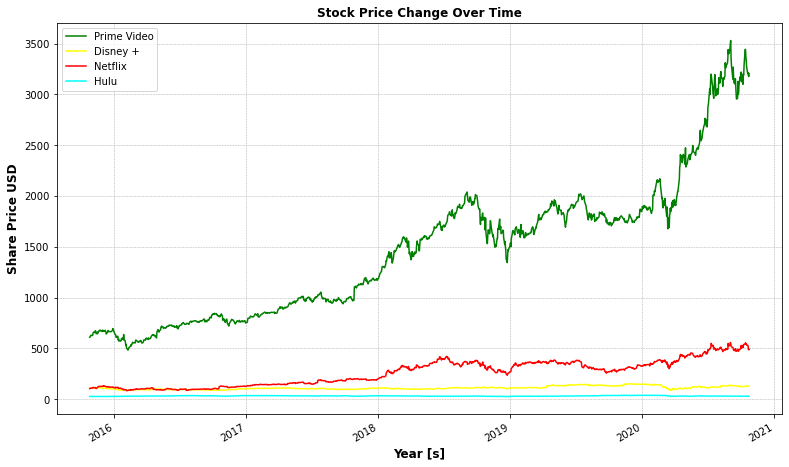

In [56]:
# Charting our way
# Time series of "closing price"
colors = ["Green", 'Yellow', 'Red', "Aqua"]
labels = ['Prime Video', 'Disney +', 'Netflix', 'Hulu']
historical_data['Close'].plot(figsize=(13, 8),color=colors)
plt.ylabel('Share Price USD', fontsize='large', fontweight='bold')
plt.xlabel('Year [s]', fontsize='large', fontweight='bold')
plt.title('Stock Price Change Over Time', fontsize='large', fontweight='bold')
plt.grid(linestyle='dashed', linewidth=.5)
plt.legend(labels)
plt.savefig('../Final_Datasets/stock_price)


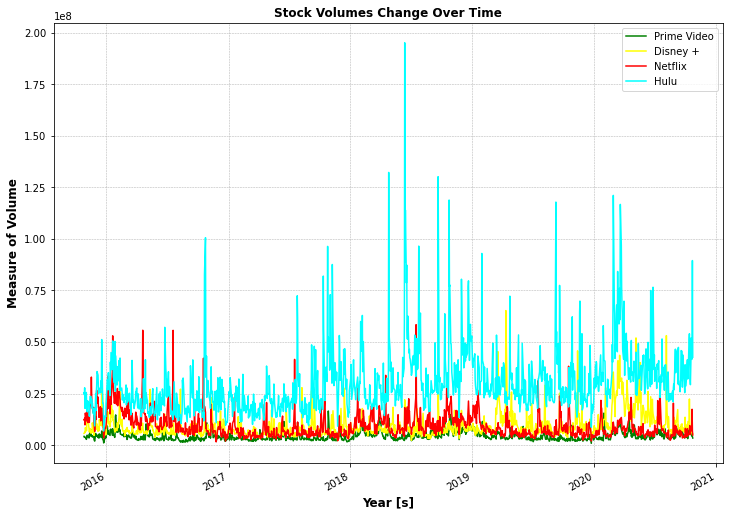

In [55]:
colors = ["Green", 'Yellow', 'Red', "Aqua"]
labels2 = ['Prime Video', 'Disney +', 'Netflix', 'Hulu']
historical_data['Volume'].plot(figsize=(12, 9), color=colors)
plt.ylabel('Measure of Volume', fontsize='large', fontweight='bold')
plt.xlabel('Year [s]', fontsize='large', fontweight='bold')
plt.title('Stock Volumes Change Over Time', fontsize='large', fontweight='bold')
plt.grid(linestyle='dashed', linewidth=.5)
plt.legend(labels2)